<a href="https://colab.research.google.com/github/shailu1999/Car_prices_Prediction/blob/master/car_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1507]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem Statement**

---



A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

(NOTE: A box plot which is also known as a whisker plot displays a summary of a set of data containing the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.
A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

Minimum : the lowest data point excluding any outliers.

Maximum : the largest data point excluding any outliers.

Median (Q2 / 50th Percentile) : the middle value of the dataset.

First quartile (Q1 / 25th Percentile) : also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

Third quartile (Q3 / 75th Percentile) : also known as the upper quartile qn(0.75), is the median of the upper half of the dataset.[4]

An important element used to construct the box plot by determining the minimum and maximum data values feasible, but is not part of the aforementioned five-number summary, is the interquartile range or IQR denoted below:

Interquartile Range (IQR) : is the distance between the upper and lower quartile.

IQR=Q3-Q1=q_{n}(0.75)-q_{n}(0.25)}
)

In [1508]:
import warnings
warnings.filterwarnings('ignore')

In [1509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the data and understand the structure of data. Import the data using the pandas library and try to understand the structure of data.


---






In [1510]:

cars=pd.read_csv("/content/drive/My Drive/cars_data.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1511]:
cars.shape

(205, 26)

In [1512]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [1513]:

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 2. Data Cleaning and preparation

In [1514]:

#Getting the company name from car name
Companyname=cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.insert(2,"CompanyName",Companyname)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Correcting the errors/spelling mistakes in company name

In [1515]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)



---


These are the errors in company name column: 

*   maxda = mazda
*   Nissan = nissan
*   toyouta = toyota
*   vokswagen = volkswagen = vw
*   porcshce = porsche


---






In [1516]:
cars.CompanyName= cars.CompanyName.str.lower()
def replace_name(a,b):
  cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [1517]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Checking for duplicates

In [1518]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [1519]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# 3. Visualizing the data

---



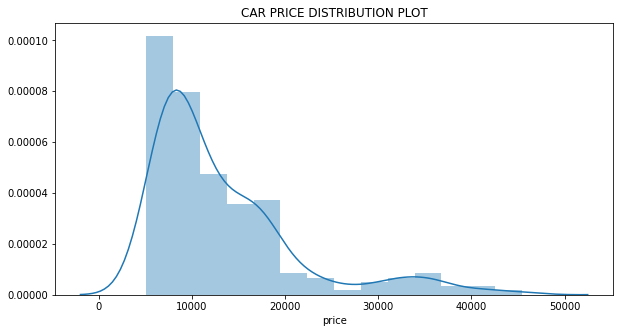

In [1520]:
plt.figure(figsize=[10,5])


plt.title("CAR PRICE DISTRIBUTION PLOT")
sns.distplot(cars.price)
plt.show()

In [1521]:
print(cars.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.95,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


# Inference :

---


1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [1522]:
cars.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Visualising Categorical Data:

---


1. CompanyName
2. Symboling
3. fueltype
4. enginetype
5. carbody
6. doornumber
7. enginelocation
8. fuelsystem
9. cylindernumber
10. aspiration
11. drivewheel

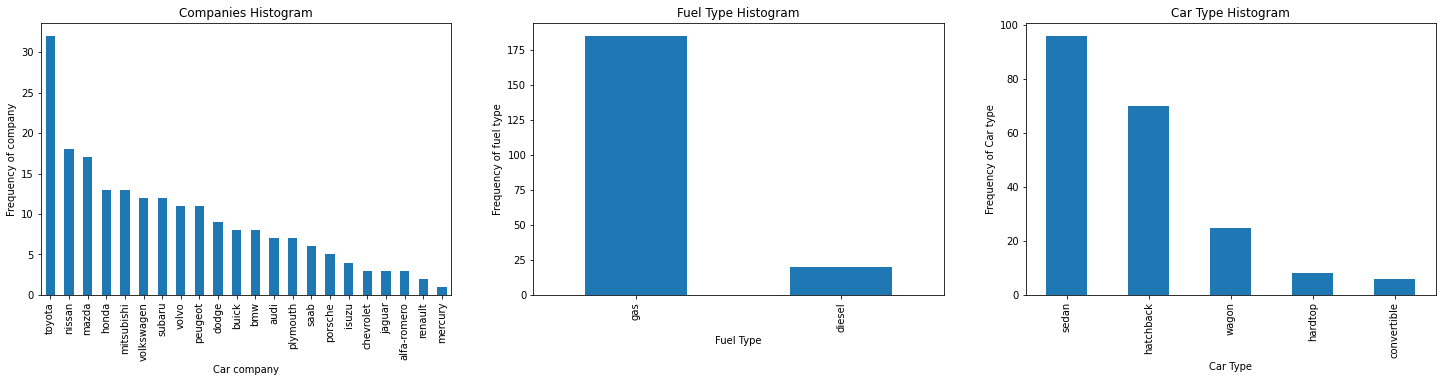

In [1523]:

plt.figure(figsize=(25, 5))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

# Inference :

---


1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered.

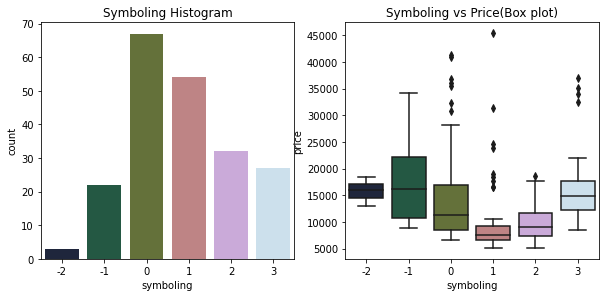

In [1524]:

plt.figure(figsize=[10,20])

plt.subplot(4,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette='cubehelix') 

plt.subplot(4,2,2)
plt.title('Symboling vs Price(Box plot)')
sns.boxplot(x=cars.symboling, y=cars.price,palette='cubehelix')


plt.show()

# Inference

---



1. Symboling with 0 and 1 values are mostly sold.
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.



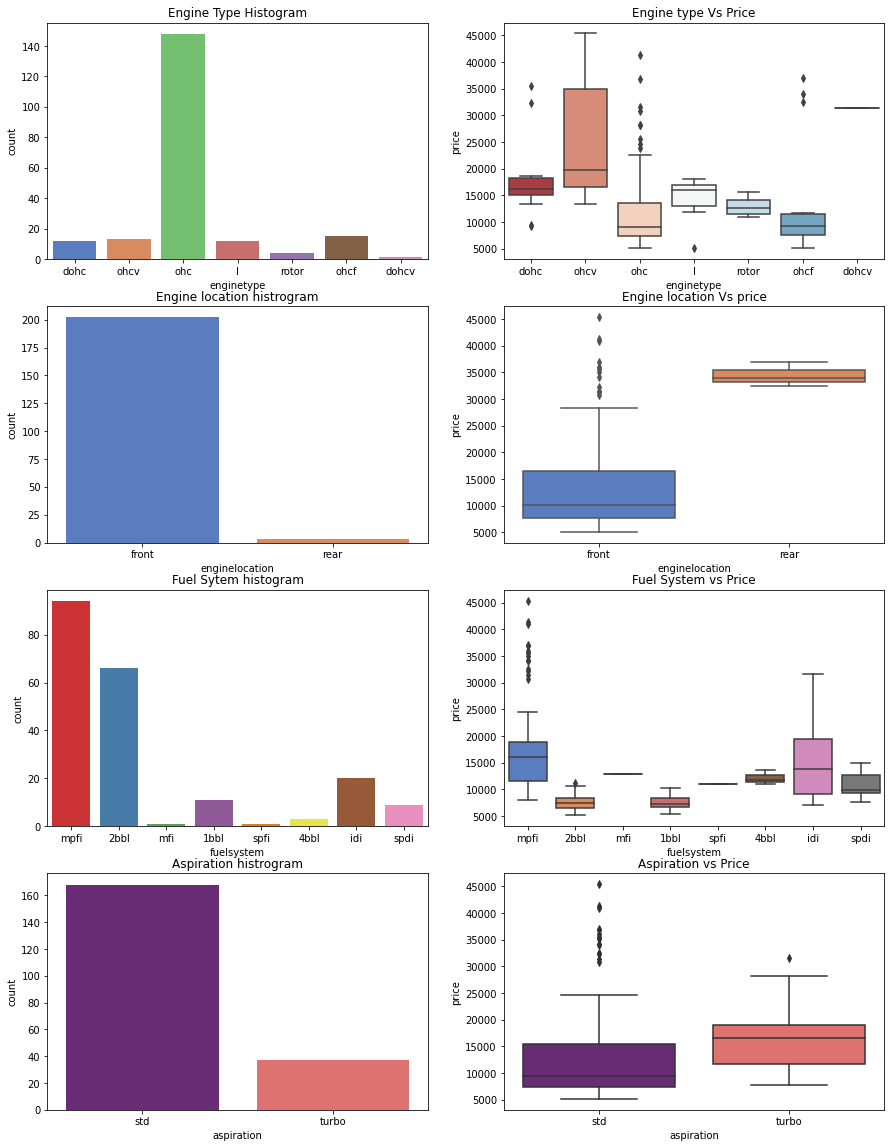

In [1525]:
plt.figure(figsize=[15,20])

plt.subplot(4,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette='muted')

plt.subplot(4,2,2)
plt.title('Engine type Vs Price')
sns.boxplot(x=cars.enginetype,y=cars.price, palette='RdBu')

plt.subplot(4,2,3)
plt.title('Engine location histrogram')
sns.countplot(cars.enginelocation, palette='muted')

plt.subplot(4,2,4)
plt.title('Engine location Vs price')
sns.boxplot(x=cars.enginelocation,y=cars.price, palette='muted')

plt.subplot(4,2,5)
plt.title('Fuel Sytem histogram')
sns.countplot(cars.fuelsystem,palette='Set1')

plt.subplot(4,2,6)
plt.title('Fuel System vs Price')
sns.boxplot(x=cars.fuelsystem,y=cars.price,palette='muted')

plt.subplot(4,2,7)
plt.title('Aspiration histrogram')
sns.countplot(cars.aspiration,palette='magma')

plt.subplot(4,2,8)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette='magma')
plt.show()

# Inference:
---
**Engine Type:**
1. ohc is the most favoured type
2. ohcv has the highest price and ohc and ohcf has the lowest prices
**Engine Location**
1. front is the most favoured
2. rear is the costliest
**Fuel System:**
1. mpfi is the most produced
2. idi is the costliest and 2bbl and 1bbl are the cheapest
**Aspiration:**
1. std is the most favoured
2. turbo is more costlier than std





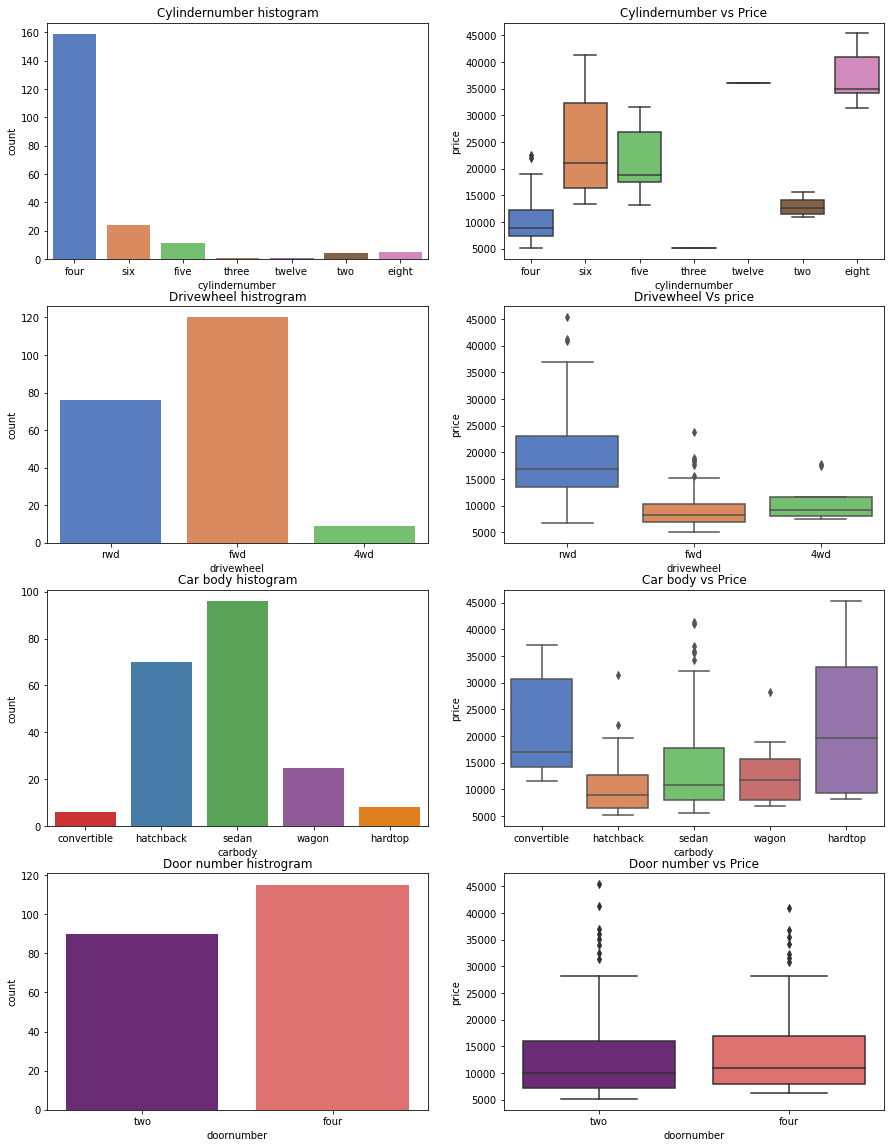

In [1526]:
plt.figure(figsize=[15,20])

plt.subplot(4,2,1)
plt.title('Cylindernumber histogram')
sns.countplot(cars.cylindernumber, palette='muted')

plt.subplot(4,2,2)
plt.title('Cylindernumber vs Price')
sns.boxplot(x=cars.cylindernumber, y=cars.price, palette='muted')

plt.subplot(4,2,3)
plt.title('Drivewheel histrogram')
sns.countplot(cars.drivewheel, palette='muted')

plt.subplot(4,2,4)
plt.title('Drivewheel Vs price')
sns.boxplot(x=cars.drivewheel,y=cars.price, palette='muted')

plt.subplot(4,2,5)
plt.title('Car body histogram')
sns.countplot(cars.carbody,palette='Set1')

plt.subplot(4,2,6)
plt.title('Car body vs Price')
sns.boxplot(x=cars.carbody,y=cars.price,palette='muted')

plt.subplot(4,2,7)
plt.title('Door number histrogram')
sns.countplot(cars.doornumber,palette='magma')

plt.subplot(4,2,8)
plt.title('Door number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette='magma')
plt.show()


# Inference:
---
**Cylinder Number:**
1. Cylinder number 4 is the most favoured.
2. eight has the highest price of all
**Drivewheel:**
1. fwd is the most produced
2. rwd is the costliest, and 4wd is the cheapest
**Car body:**
1. Sedan carbody is the most favoured
2. hardtop has the highest price.
3. hatchback and sedan carbody have the lowest prices.
**Door Number:**
1. four is mostly produced
2. door number is basically not affecting the price , as there is no significance between the categories in it.



#Visualising Numerical Data
---
1. carwidth
2. carlength
3. carheight
4. curb weight
5. horsepower
6. highwaympg
7. citympg
8. Enginesize
9. boreratio
10. Stroke
11. Compression ratio
12. Peekrpm
13. wheelbase

Text(0, 0.5, 'Price')

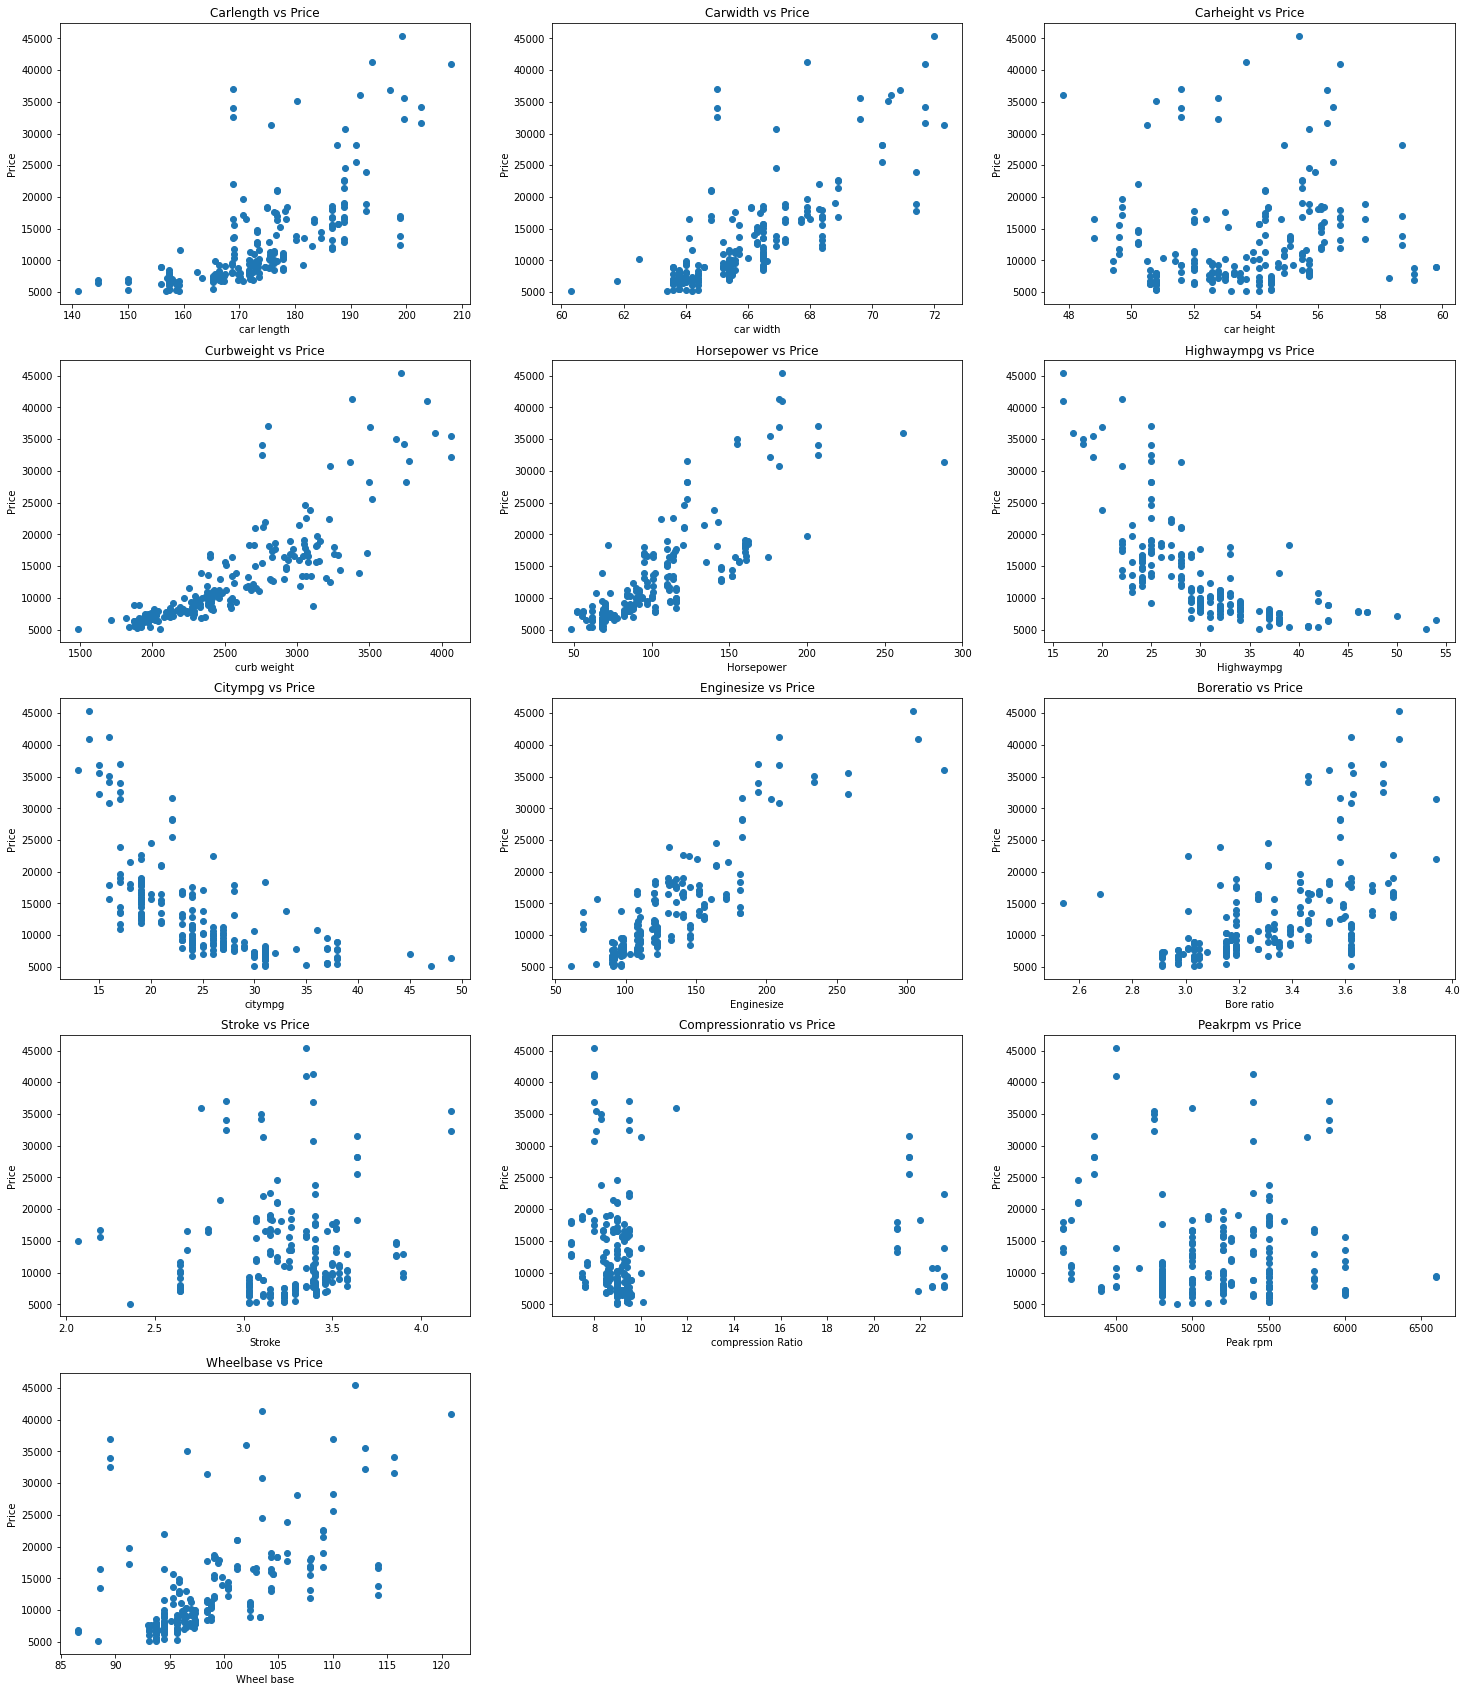

In [1527]:
plt.figure(figsize=[25,30])

plt.subplot(5,3,1)
plt.title('Carlength vs Price')
plt.scatter(cars.carlength,cars.price)
plt.xlabel('car length')
plt.ylabel('Price')

plt.subplot(5,3,2)
plt.title('Carwidth vs Price')
plt.scatter(cars.carwidth,cars.price)
plt.xlabel('car width')
plt.ylabel('Price')

plt.subplot(5,3,3)
plt.title('Carheight vs Price')
plt.scatter(cars.carheight,cars.price)
plt.xlabel('car height')
plt.ylabel('Price')

plt.subplot(5,3,4)
plt.title('Curbweight vs Price')
plt.scatter(cars.curbweight,cars.price)
plt.xlabel('curb weight')
plt.ylabel('Price')

plt.subplot(5,3,5)
plt.title('Horsepower vs Price')
plt.scatter(cars.horsepower,cars.price)
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.subplot(5,3,6)
plt.title('Highwaympg vs Price')
plt.scatter(cars.highwaympg,cars.price)
plt.xlabel('Highwaympg')
plt.ylabel('Price')

plt.subplot(5,3,7)
plt.title('Citympg vs Price')
plt.scatter(cars.citympg,cars.price)
plt.xlabel('citympg')
plt.ylabel('Price')

plt.subplot(5,3,8)
plt.title('Enginesize vs Price')
plt.scatter(cars.enginesize,cars.price)
plt.xlabel('Enginesize')
plt.ylabel('Price')

plt.subplot(5,3,9)
plt.title('Boreratio vs Price')
plt.scatter(cars.boreratio,cars.price)
plt.xlabel('Bore ratio')
plt.ylabel('Price')

plt.subplot(5,3,10)
plt.title('Stroke vs Price')
plt.scatter(cars.stroke,cars.price)
plt.xlabel('Stroke')
plt.ylabel('Price')

plt.subplot(5,3,11)
plt.title('Compressionratio vs Price')
plt.scatter(cars.compressionratio,cars.price)
plt.xlabel('compression Ratio')
plt.ylabel('Price')

plt.subplot(5,3,12)
plt.title('Peakrpm vs Price')
plt.scatter(cars.peakrpm,cars.price)
plt.xlabel('Peak rpm')
plt.ylabel('Price')

plt.subplot(5,3,13)
plt.title('Wheelbase vs Price')
plt.scatter(cars.wheelbase,cars.price)
plt.xlabel('Wheel base')
plt.ylabel('Price')

#Inference:
---
1. carwidth, carlength , curbweight enginesize, boreratio, horsepower, wheelbase - seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.
3. citympg, highwaympg - seem to have a significant negative correlation with price.

In [1528]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

# 4. Deriving new Features

In [1529]:


cars['fueleconomy'] = (0.55*cars['citympg']+0.45*cars['highwaympg'])

In [1530]:


#Binning-  In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins.
#Just forming ranges as far as I know
cars.price=cars.price.astype('int')
temp=cars.copy()
table=temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName') #Reset the index of the DataFrame, and use the default one instead.
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium



#5. Bivariate Analysis
---
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables

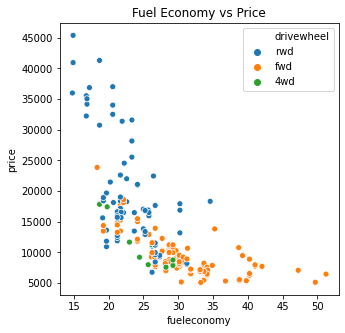

In [1531]:
plt.figure(figsize=[5,5])

plt.title('Fuel Economy vs Price')
sns.scatterplot(x=cars.fueleconomy, y=cars.price, hue=cars.drivewheel)

#Inference
---
1. Fuel economy has negative correlation with price

<Figure size 720x1080 with 0 Axes>

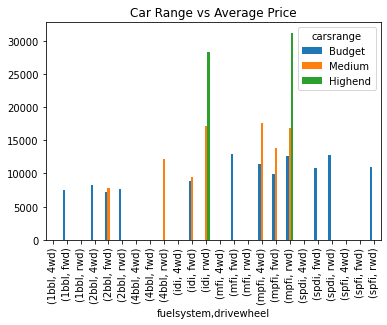

In [1532]:
plt.figure(figsize=[10,15])

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#Inference:
---
High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

In [1533]:
cars.shape

(205, 28)

In [1534]:
cars.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
fueleconomy         0
carsrange           0
dtype: int64


#List of important vaiables after visual analysis:
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [1535]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


#6. Creating dummy variables
---
for example, let us take fueltype:
1. Since fueltype is a categorical var, we are getting its categories namely- gas and diesel. Since, gas is the most preferred one, we are taking gas, and creating a df with a single column gas, as we are dropping the first col which is not required.
2. We are going to add this df(temp) thus created with only column - gas to the cars_lr
3. cars_lr contains a column called 'fueltype'. We are just going to drop that column alone

In [1536]:
def dummies(x,df):
  temp=pd.get_dummies(df[x],drop_first=True)
  df=pd.concat([df,temp],axis=1)
  df.drop([x],axis=1, inplace=True)
  return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [1537]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [1538]:
cars_lr.shape

(205, 31)

#7. Train-Test Split and Feature scaling

In [1539]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test=train_test_split(cars_lr, train_size=0.7, test_size=0.3,random_state=100)

In [1540]:
#We can normalize our dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [1541]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [1542]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Finding the Correlation 

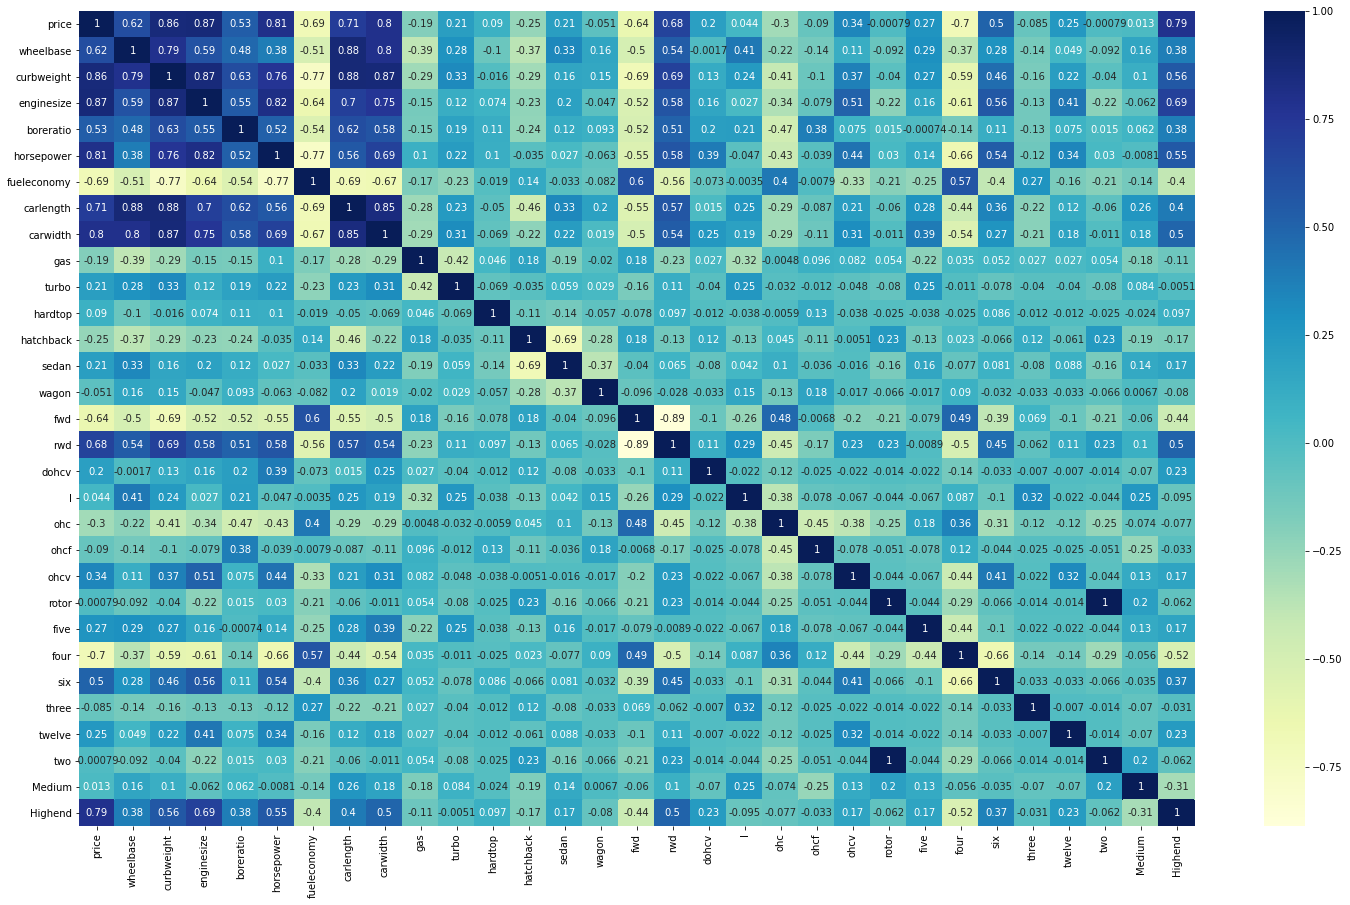

In [1543]:
plt.figure(figsize=[25,15])
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

Highly correlated to price are - curbweight, enginesize, horsepower, carwidth and highend

In [1544]:
#Dividing data to X and y vars
y_train=df_train.pop('price')
X_train=df_train

#8. Model Building

RFE- Feature ranking with recursive feature elimination.. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
RFE is an efficient approach for eliminating features from a training dataset for feature selection.

The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

#Now we are going to perform feature selection

In [1545]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1546]:
model=LinearRegression()
model.fit(X_train,y_train)
rfe=RFE(model, 10)# Estimator and no. of features to select is mentioned
rfe= rfe.fit(X_train, y_train)

In [1547]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#rfe.support_ - whether the feature is selected or not

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [1548]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

#Building model using statsmodels for the detailed statics
---
* statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
* OLS: In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.
* Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.


In [1549]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [1550]:
#Building the model
def buildmodel(X,y):
  X=sm.add_constant(X)#Adding the constant
  model=sm.OLS(y,X).fit()
  print(model.summary()) # model summary
  return X
def checkVIF(X): #how much info of X variable is contained on the other varaibles. X can be the one which is passed to this function
  vif=pd.DataFrame()
  vif['features']=X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return(vif)

#Model 1
---
Note: p values are numbers b/w 0 and 1, that quantify how confident we should be that a particular variable is better than the other one.

A predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

In [1551]:
X_train_new=buildmodel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.29e-70
Time:                        18:37:30   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p value of twelve is the highest(0.079) definetely higher than 0.05, maing it insignificant in the presence of other varaibles. So we are going to Drop that col

In [1552]:
X_train_new=X_train_rfe.drop(["twelve"],axis=1)

#Model 2

In [1553]:
X_train_new=buildmodel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.25e-71
Time:                        18:37:30   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [1554]:
X_train_new=X_train_new.drop(["fueleconomy"],axis=1)#Dropping that coz, p value is much greater than 0.05

#Model 3

In [1555]:
X_train_new=buildmodel(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           7.85e-72
Time:                        18:37:30   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [1556]:
checkVIF(X_train_new) #Curbweight has the highest VIF

,features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [1557]:
X_train_new=X_train_new.drop(['curbweight'],axis=1)

#Model 4

In [1558]:
X_train_new=buildmodel(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.70e-70
Time:                        18:37:30   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [1559]:
checkVIF(X_train_new)# dropping sedan as vif is high

,features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [1560]:
X_train_new=X_train_new.drop(["sedan"],axis=1)

#Model 5

In [1561]:
X_train_new=buildmodel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.68e-69
Time:                        18:37:30   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [1562]:
X_train_new=X_train_new.drop(["wagon"],axis=1)

In [1563]:
X_train_new=buildmodel(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.57e-70
Time:                        18:37:30   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [1564]:
checkVIF(X_train_new)

,features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


#Model 7

In [1565]:
#Let's see if dropping dohcv changes the model statistics
X_train_new=X_train_new.drop(['dohcv'],axis=1)

In [1566]:
X_train_new=buildmodel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.04e-67
Time:                        18:37:30   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [1567]:
checkVIF(X_train_new)

,features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


#9. Residual Analysis
---
* Because a linear regression model is not always appropriate for the data, you should assess the appropriateness of the model by defining residuals and examining residual plots. Anyone who has performed ordinary least squares (OLS) regression analysis knows that you need to check the residual plots in order to validate your model. The bottom line is that randomness and unpredictability are crucial components of any regression model. If you don’t have those, your model is not valid.
* An error term in statistics is a value which represents how observed data differs from actual population data. It can also be a variable which represents how a given statistical model differs from reality. The error term is often written ε.
* Although the terms error and residual are often interchanged, there is an important formal difference. While an error term represents the way observed data differs from the actual population, a residual represents the way observed data differs from sample population data. This means that a residual is often much easier to quantify. Although an error is generally unobservable, a residual is observable.

The residual can be considered an estimate of the true error term.

In [1568]:
model=sm.OLS(y_train, X_train_new).fit()
y_train_price=model.predict(X_train_new)

Text(0.5, 0, 'Errors')

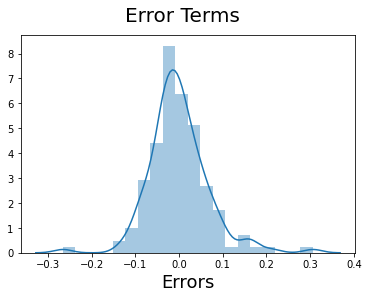

In [1569]:
#Plotting the histogram of error terms
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
#Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

#10. Prediction and Evaluations

In [1570]:
#Scaling the test_set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [1571]:
#Dividing into X and Y
y_test=df_test.pop('price')
X_test=df_test

In [1572]:
#Using our model to make predictions
X_train_new=X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
#Adding a constant var
X_test_new=sm.add_constant(X_test_new)

In [1573]:
#Making predictions
y_pred=model.predict(X_test_new)

Evalution of test via comparision of y_pred and y_test

In [1574]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8614595209022036

Text(0, 0.5, 'y_pred')

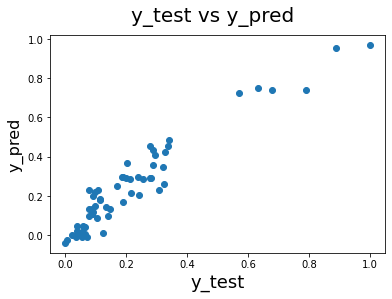

In [1575]:
#Evaluation of the model
#plotting y_test and y_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [1576]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.04e-67
Time:                        18:44:47   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

#Inference:
---
* R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fi is significant and explained 90% variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.